In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Feature Engineering

1. Loading the Data using the Apache Spark
2. Exploratory Data Analysis
3. Converting the Target to the Numerical Values
3. Saving the Data into the Cloud


Read the CSV file "/content/drive/MyDrive/extracted_archive/balanced_combined_dataset.csv" using Apache Spark for faster processing due to its large size.

## Install pyspark

### Subtask:
Install the PySpark library to use Apache Spark in Colab.


**Reasoning**:
Install the pyspark library using pip to enable Apache Spark functionality in Colab.



In [3]:
!pip install pyspark

## Initialize spark session

### Subtask:
Create a Spark session to start working with Spark.


**Reasoning**:
Create a Spark session to start working with Spark.



In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CSV_Loading').getOrCreate()

## Load data

### Subtask:
Load the CSV file into a Spark DataFrame.


**Reasoning**:
Load the CSV file into a Spark DataFrame using the specified options.



In [5]:
spark_df = spark.read.csv('/content/drive/MyDrive/extracted_archive/balanced_combined_dataset.csv', header=True, inferSchema=True)
spark_df.show(5)

+----------------+-------------+-----------------+----------------------+---------------------------+---------------------------+---------------------+---------------------+----------------------+---------------------+---------------------+---------------------+----------------------+---------------------+------------+--------------+-------------+------------+------------+------------+-------------+------------+-----------+-----------+-----------+-------------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+-----------------+-----------------+-------------+-------------+-----------------+-----------------+------------------+-----------------+----------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+-------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------

## Display schema and data

### Subtask:
Show the schema and a few rows of the DataFrame to verify that the data is loaded correctly.


**Reasoning**:
Print the schema and show the first 10 rows of the spark_df DataFrame to verify the data loading.



In [6]:
spark_df.printSchema()
spark_df.show(n=10)

root
 |-- Destination Port: integer (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Total Fwd Packets: integer (nullable = true)
 |-- Total Backward Packets: integer (nullable = true)
 |-- Total Length of Fwd Packets: integer (nullable = true)
 |-- Total Length of Bwd Packets: integer (nullable = true)
 |-- Fwd Packet Length Max: integer (nullable = true)
 |-- Fwd Packet Length Min: integer (nullable = true)
 |-- Fwd Packet Length Mean: double (nullable = true)
 |-- Fwd Packet Length Std: double (nullable = true)
 |-- Bwd Packet Length Max: integer (nullable = true)
 |-- Bwd Packet Length Min: integer (nullable = true)
 |-- Bwd Packet Length Mean: double (nullable = true)
 |-- Bwd Packet Length Std: double (nullable = true)
 |-- Flow Bytes/s: string (nullable = true)
 |-- Flow Packets/s: string (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nullable = true)
 |-- Flow IAT Min: in

In [7]:
sample_df = spark_df.sample(False, 0.01, seed=42).toPandas()

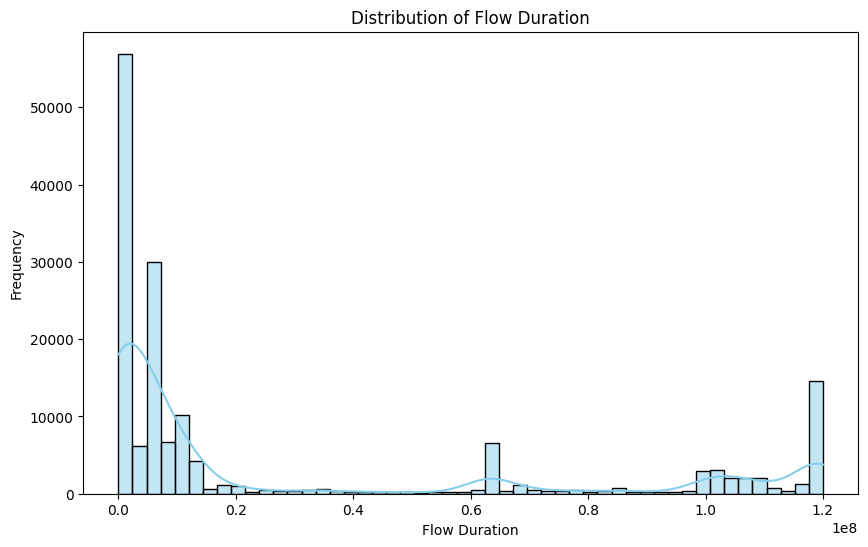

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Plot 1: Histogram of 'Flow Duration'
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Flow Duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Flow Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

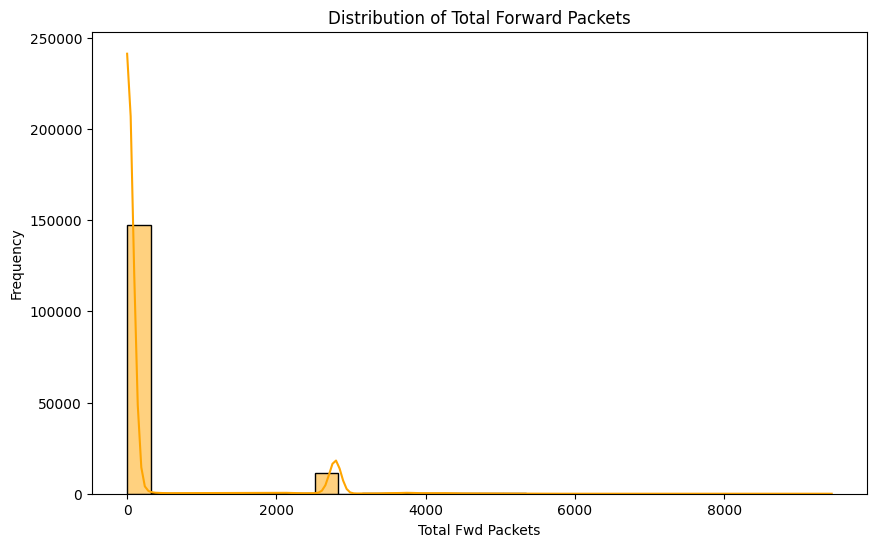

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Total Fwd Packets'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Forward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Frequency')
plt.show()

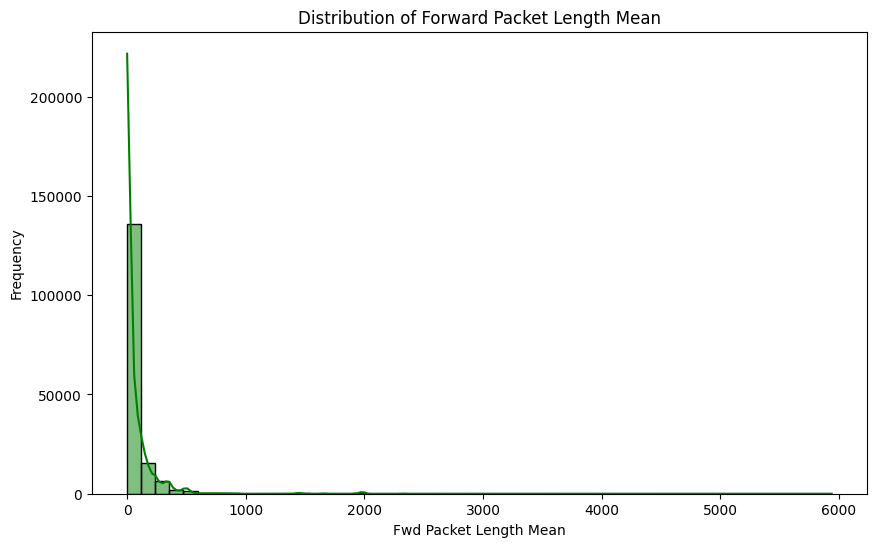

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Fwd Packet Length Mean'], bins=50, kde=True, color='green')
plt.title('Distribution of Forward Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Frequency')
plt.show()

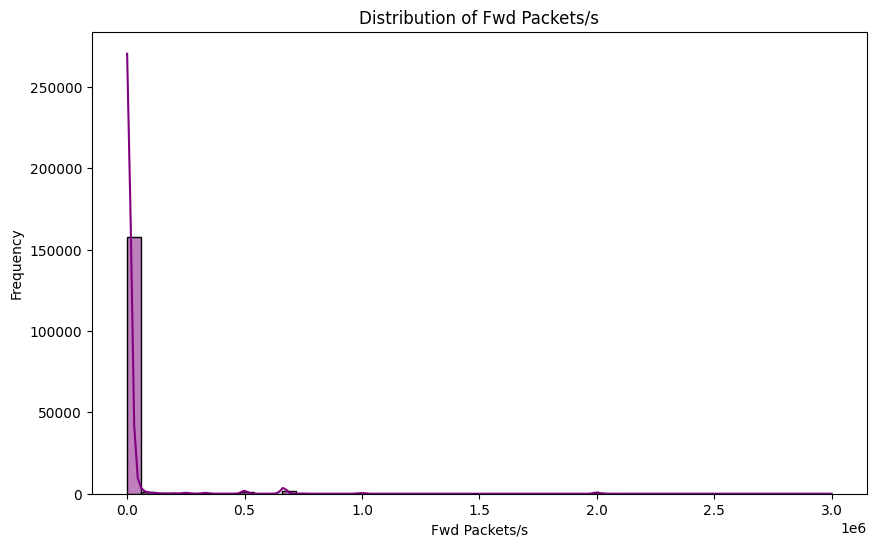

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_df['Fwd Packets/s'], bins=50, kde=True, color='purple')
plt.title('Distribution of Fwd Packets/s')
plt.xlabel('Fwd Packets/s')
plt.ylabel('Frequency')
plt.show()

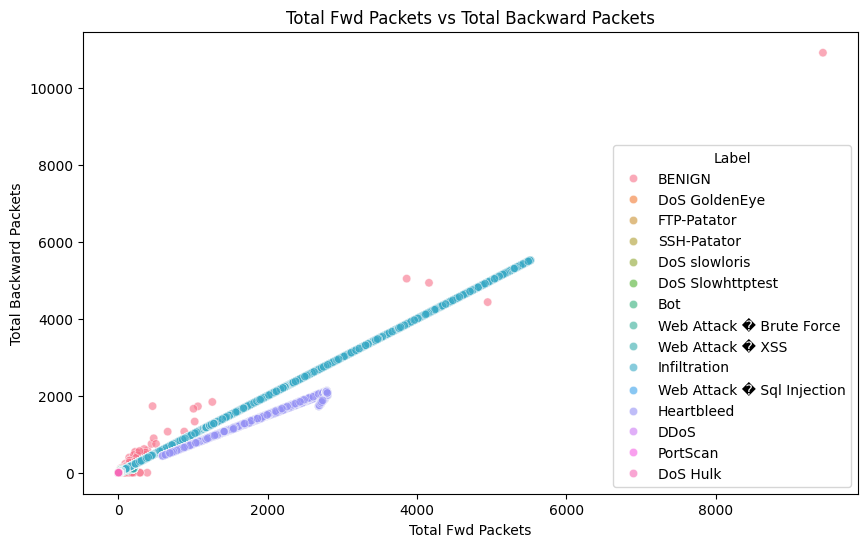

In [12]:
# Plot 5: Scatter plot for 'Total Fwd Packets' vs 'Total Backward Packets'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Fwd Packets', y='Total Backward Packets', hue='Label', data=sample_df, alpha=0.6)
plt.title('Total Fwd Packets vs Total Backward Packets')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')
plt.show()

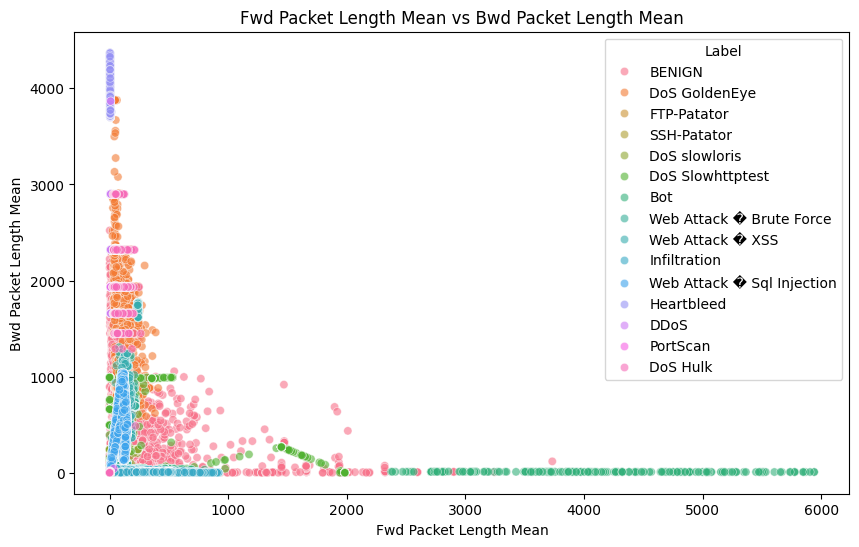

In [13]:
# Plot 7: Scatter plot for 'Fwd Packet Length Mean' vs 'Bwd Packet Length Mean'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fwd Packet Length Mean', y='Bwd Packet Length Mean', hue='Label', data=sample_df, alpha=0.6)
plt.title('Fwd Packet Length Mean vs Bwd Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Bwd Packet Length Mean')
plt.show()

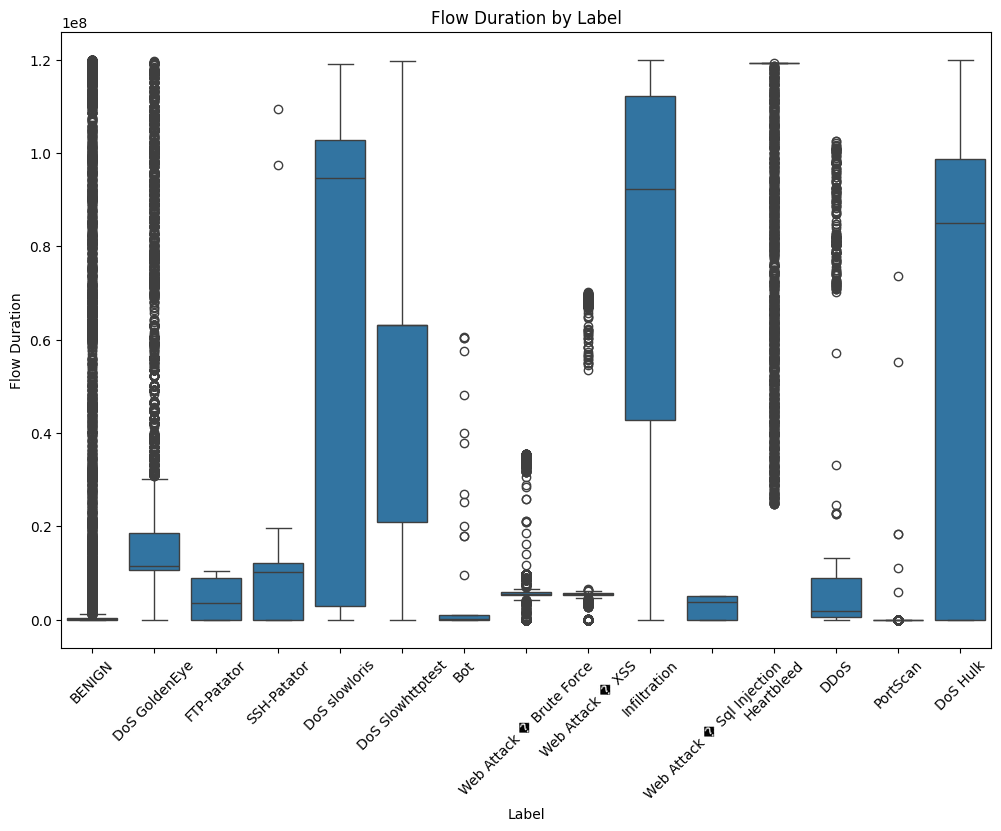

In [14]:
# Plot 8: Box plot of 'Flow Duration' by 'Label'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Flow Duration', data=sample_df)
plt.title('Flow Duration by Label')
plt.xlabel('Label')
plt.ylabel('Flow Duration')
plt.xticks(rotation=45)
plt.show()

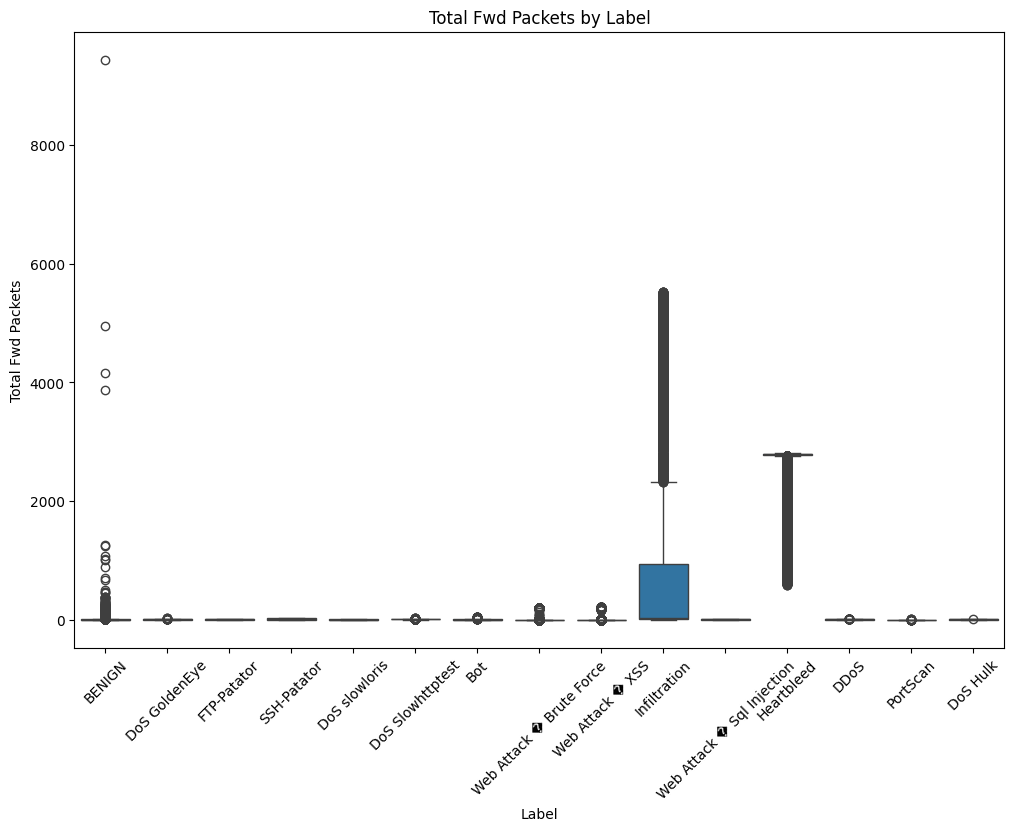

In [15]:
# Plot 9: Box plot of 'Total Fwd Packets' by 'Label'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Label', y='Total Fwd Packets', data=sample_df)
plt.title('Total Fwd Packets by Label')
plt.xlabel('Label')
plt.ylabel('Total Fwd Packets')
plt.xticks(rotation=45)
plt.show()

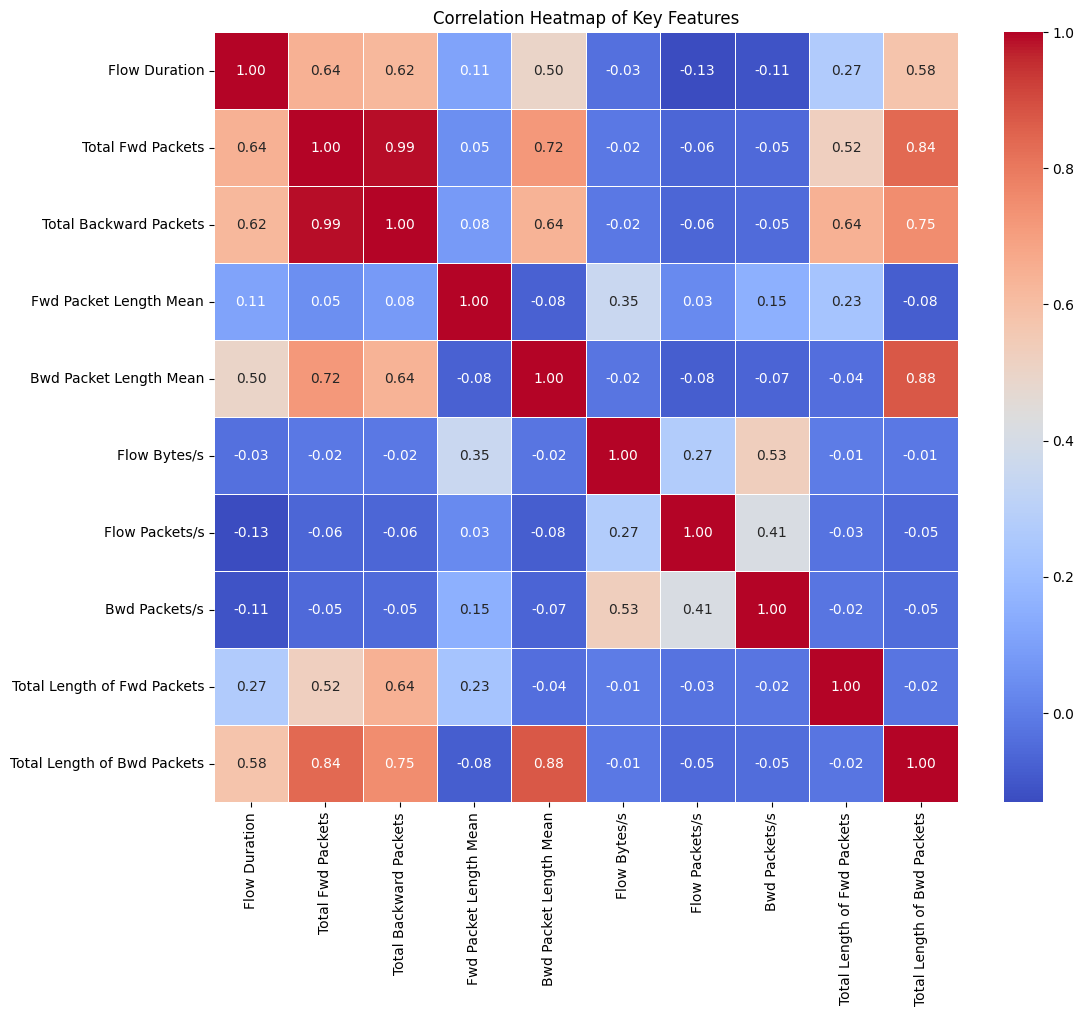

In [16]:
# Plot 10: Correlation Heatmap
# Select a few key numerical columns for the heatmap
numerical_cols = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Flow Bytes/s', 'Flow Packets/s', 'Bwd Packets/s',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets'
]

# Compute the correlation matrix
corr_matrix = sample_df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()

/tmp/ipython-input-4267955208.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Label', data=sample_df, order=sample_df['Label'].value_counts().index, palette='viridis')


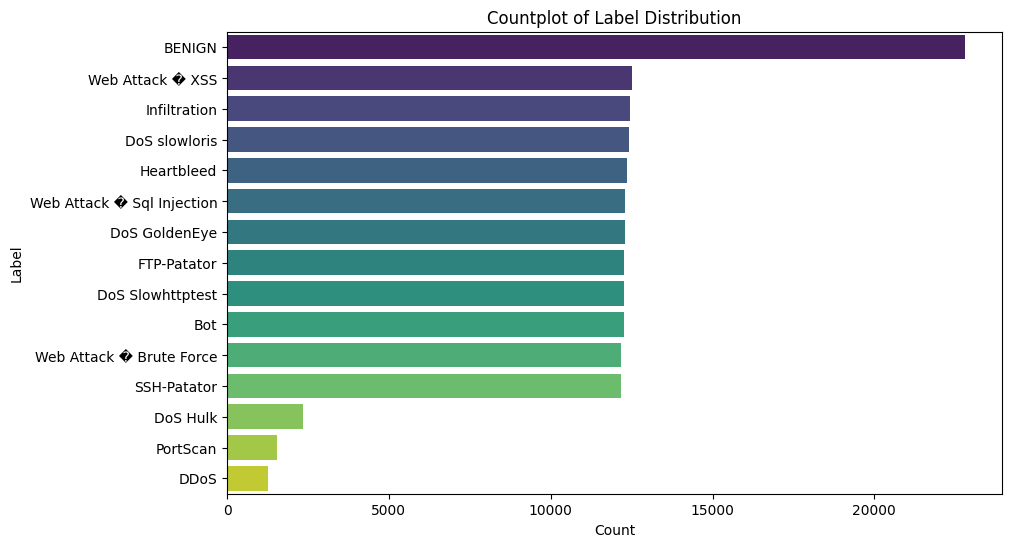

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Re-calculate label counts from the Spark DataFrame for plotting.
label_counts_df = spark_df.groupBy('Label').count().orderBy('count', ascending=False)
label_counts_pd = label_counts_df.toPandas()

# Plot 11: Seaborn Countplot for Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Label', data=sample_df, order=sample_df['Label'].value_counts().index, palette='viridis')
plt.title('Countplot of Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

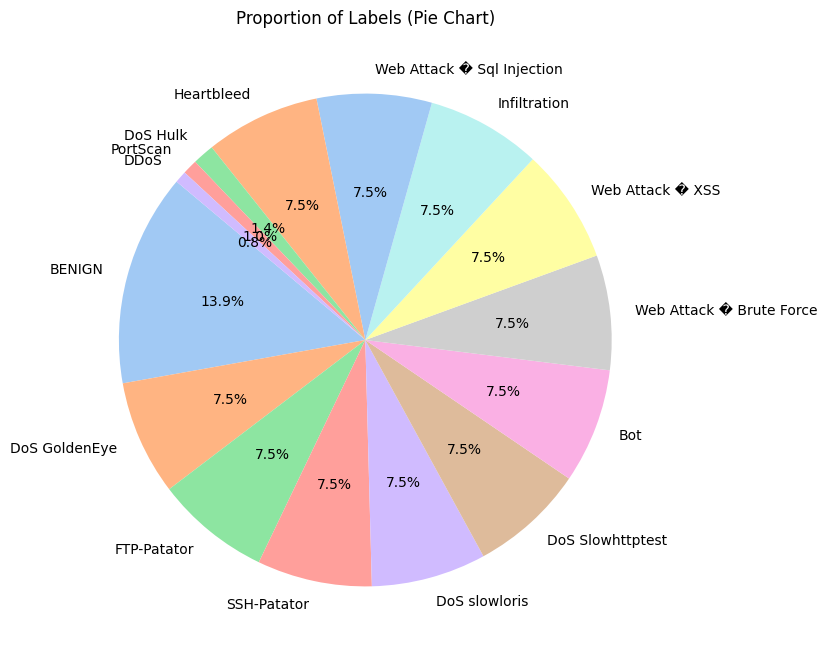

In [18]:
# Plot 12: Matplotlib Pie Chart for Label Distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts_pd['count'], labels=label_counts_pd['Label'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Labels (Pie Chart)')
plt.show()

# Task
Read the CSV file "/content/drive/MyDrive/extracted_archive/balanced_combined_dataset.csv" into a Spark DataFrame. Check the data types of the columns. Apply StandardScaler to the numerical columns and LabelEncoder to the 'Label' column.

## Check data types

### Subtask:
Display the schema of the Spark DataFrame to identify column data types.


**Reasoning**:
Display the schema of the Spark DataFrame to identify column data types as requested by the subtask.



In [19]:
spark_df.printSchema()

root
 |-- Destination Port: integer (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Total Fwd Packets: integer (nullable = true)
 |-- Total Backward Packets: integer (nullable = true)
 |-- Total Length of Fwd Packets: integer (nullable = true)
 |-- Total Length of Bwd Packets: integer (nullable = true)
 |-- Fwd Packet Length Max: integer (nullable = true)
 |-- Fwd Packet Length Min: integer (nullable = true)
 |-- Fwd Packet Length Mean: double (nullable = true)
 |-- Fwd Packet Length Std: double (nullable = true)
 |-- Bwd Packet Length Max: integer (nullable = true)
 |-- Bwd Packet Length Min: integer (nullable = true)
 |-- Bwd Packet Length Mean: double (nullable = true)
 |-- Bwd Packet Length Std: double (nullable = true)
 |-- Flow Bytes/s: string (nullable = true)
 |-- Flow Packets/s: string (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nullable = true)
 |-- Flow IAT Min: in

## Identify numerical and categorical columns

### Subtask:
Identify numerical columns for scaling and the 'Label' column for encoding based on the DataFrame schema.

**Reasoning**:
Based on the schema provided, identify columns with numerical data types (integer, long, double) and the 'Label' column which is of string type and needs encoding. Columns 'Flow Bytes/s' and 'Flow Packets/s' are strings and will need to be cast to numeric types before scaling.

In [20]:
numerical_cols = [col for col, dtype in spark_df.dtypes if dtype in ['int', 'long', 'double']]
categorical_cols = ['Label']

# Identify string type numerical columns that need casting
string_numerical_cols = [col for col, dtype in spark_df.dtypes if dtype == 'string' and col in ['Flow Bytes/s', 'Flow Packets/s']]

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("String numerical columns to cast:", string_numerical_cols)

Numerical columns: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet 

In [21]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="Label", outputCol="label_index")
spark_df_indexed = indexer.fit(spark_df).transform(spark_df)

spark_df_indexed.select("Label", "label_index").show(5)

+------+-----------+
| Label|label_index|
+------+-----------+
|BENIGN|        0.0|
|BENIGN|        0.0|
|BENIGN|        0.0|
|BENIGN|        0.0|
|BENIGN|        0.0|
+------+-----------+
only showing top 5 rows



## Cast String Numerical Columns

### Subtask:
Cast the 'Flow Bytes/s' and 'Flow Packets/s' columns from string to double type.

**Reasoning**:
The schema shows 'Flow Bytes/s' and 'Flow Packets/s' as string type, but they contain numerical values. Casting them to double is necessary before applying StandardScaler. Also, handle potential errors during casting by replacing invalid values with null.

In [22]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

for column in string_numerical_cols:
    spark_df_indexed = spark_df_indexed.withColumn(column, col(column).cast(DoubleType()))

spark_df_indexed.printSchema()

root
 |-- Destination Port: integer (nullable = true)
 |-- Flow Duration: integer (nullable = true)
 |-- Total Fwd Packets: integer (nullable = true)
 |-- Total Backward Packets: integer (nullable = true)
 |-- Total Length of Fwd Packets: integer (nullable = true)
 |-- Total Length of Bwd Packets: integer (nullable = true)
 |-- Fwd Packet Length Max: integer (nullable = true)
 |-- Fwd Packet Length Min: integer (nullable = true)
 |-- Fwd Packet Length Mean: double (nullable = true)
 |-- Fwd Packet Length Std: double (nullable = true)
 |-- Bwd Packet Length Max: integer (nullable = true)
 |-- Bwd Packet Length Min: integer (nullable = true)
 |-- Bwd Packet Length Mean: double (nullable = true)
 |-- Bwd Packet Length Std: double (nullable = true)
 |-- Flow Bytes/s: double (nullable = true)
 |-- Flow Packets/s: double (nullable = true)
 |-- Flow IAT Mean: double (nullable = true)
 |-- Flow IAT Std: double (nullable = true)
 |-- Flow IAT Max: integer (nullable = true)
 |-- Flow IAT Min: in

## Handle Numerical Features

### Subtask:
Assemble numerical features into a single vector column and apply StandardScaler.

**Reasoning**:
Use VectorAssembler to combine all numerical features into a single vector column, which is required for StandardScaler. Then, apply StandardScaler to normalize the features to have zero mean and unit variance, which is important for many machine learning algorithms.

In [23]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Assemble numerical features into a vector
assembler_inputs = numerical_cols + string_numerical_cols
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="unscaled_features")
spark_df_assembled = assembler.transform(spark_df_indexed)

# Apply StandardScaler
scaler = StandardScaler(inputCol="unscaled_features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(spark_df_assembled)
spark_df_scaled = scaler_model.transform(spark_df_assembled)

spark_df_scaled.select("unscaled_features", "scaled_features").show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Combine Features

### Subtask:
Combine the scaled numerical features and the indexed label into a final DataFrame for modeling.

**Reasoning**:
Select the scaled features and the indexed label column to create the final DataFrame that will be used as input for machine learning models.

In [24]:
final_spark_df = spark_df_scaled.select("scaled_features", "label_index")
final_spark_df.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
# Split the data into training and testing sets
train_data, test_data = final_spark_df.randomSplit([0.7, 0.3], seed=42)

print("Training set count:", train_data.count())
print("Testing set count:", test_data.count())

Training set count: 11422449
Testing set count: 4898678


In [27]:
train_data = train_data.withColumnRenamed("scaled_features", "features").withColumnRenamed("label_index", "label")
test_data = test_data.withColumnRenamed("scaled_features", "features").withColumnRenamed("label_index", "label")

train_data.printSchema()
test_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = false)



In [28]:
# Sample 0.1% of the training data
sampled_train_data = train_data.sample(False, 0.001, seed=42)

print("Sampled training set count:", sampled_train_data.count())

Sampled training set count: 11435


In [33]:
!pip install xgboost

In [36]:
from xgboost.spark import SparkXGBClassifier

# The 'nthread' parameter has been replaced by 'num_workers'
xgb_classifier = SparkXGBClassifier(
    features_col="features",
    label_col="label",
    num_workers=4, # Corrected from nthread=4
    missing=0.0
)

# Train the model on the sampled training data
xgb_model = xgb_classifier.fit(sampled_train_data)

print("XGBoost model training complete.")

INFO:XGBoost-PySpark:Running xgboost-3.0.2 on 4 workers with
	booster params: {'objective': 'multi:softprob', 'device': 'cpu', 'num_class': 15, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': 0.0}
INFO:XGBoost-PySpark:Finished xgboost training!


XGBoost model training complete.


In [37]:
sampled_test_data = test_data.sample(False, 0.001, seed=42)
print("Sampled test set count:", sampled_test_data.count())

Sampled test set count: 4957


In [40]:
# Make predictions on the sampled test data
predictions_df = xgb_model.transform(sampled_test_data)

# Show the first few predictions to verify
print("Sample of predictions:")
predictions_df.select("label", "prediction", "rawPrediction").show(1000)

Sample of predictions:
+-----+----------+--------------------+
|label|prediction|       rawPrediction|
+-----+----------+--------------------+
|  0.0|       0.0|[9.13891410827636...|
|  0.0|       0.0|[9.13891410827636...|
|  0.0|       0.0|[9.17692756652832...|
|  0.0|       0.0|[9.63165473937988...|
|  0.0|       0.0|[9.5392427444458,...|
|  0.0|       0.0|[9.01563549041748...|
|  0.0|       0.0|[9.53324222564697...|
|  0.0|       0.0|[8.85416698455810...|
|  0.0|       0.0|[9.03439521789550...|
|  0.0|       0.0|[9.12617301940918...|
|  0.0|       0.0|[8.75496768951416...|
|  0.0|       0.0|[9.22985935211181...|
|  0.0|       0.0|[9.45278549194336...|
|  0.0|       0.0|[9.55664920806884...|
|  0.0|       0.0|[8.75145435333252...|
|  0.0|       0.0|[8.83203411102295...|
|  0.0|       0.0|[9.18656158447265...|
|  0.0|       0.0|[9.44090843200683...|
|  0.0|       0.0|[9.58881187438964...|
|  0.0|       0.0|[9.21713256835937...|
|  0.0|       0.0|[9.37804698944091...|
|  0.0|       0.0

In [41]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize the evaluator for accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

# Calculate and print the accuracy
accuracy = accuracy_evaluator.evaluate(predictions_df)
print(f"Accuracy of the XGBoost model: {accuracy:.4f}")

# You can also get other metrics like F1-score
f1_evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="f1"
)
f1_score = f1_evaluator.evaluate(predictions_df)
print(f"F1-Score of the XGBoost model: {f1_score:.4f}")

Accuracy of the XGBoost model: 0.9580
F1-Score of the XGBoost model: 0.9580


In [42]:
model_path = "/content/drive/MyDrive/extracted_archive"

# Save the trained model
xgb_model.save(model_path)

print(f"XGBoost model saved successfully to: {model_path}")

XGBoost model saved successfully to: /content/drive/MyDrive/extracted_archive
